# 3.2-Clustering and further filtering

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-20"

## Introduction

Normalize data and do unsupervised clustering for each fraction of the experiment

In [2]:
sample <- "41BBpos"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(here)
library(glue)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#dr_here(show_reason = TRUE)
source(here("SCGRES_124_125/sc_analysis/misc/paths.R"))
source(here("SCGRES_124_125/sc_analysis/misc/variables.R"))
source(here("utils/bin.R"))

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here(glue("{clust}/{robj_dir}/dimred_combined_object_{sample}.rds")))

In [6]:
var_name <- paste0("comp_", sample)
dcomp <- get(var_name)

### First clustering to localize doublets

In [7]:
reso = 0.3

In [8]:
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = dcomp)
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2566
Number of edges: 80342

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8991
Number of communities: 8
Elapsed time: 0 seconds


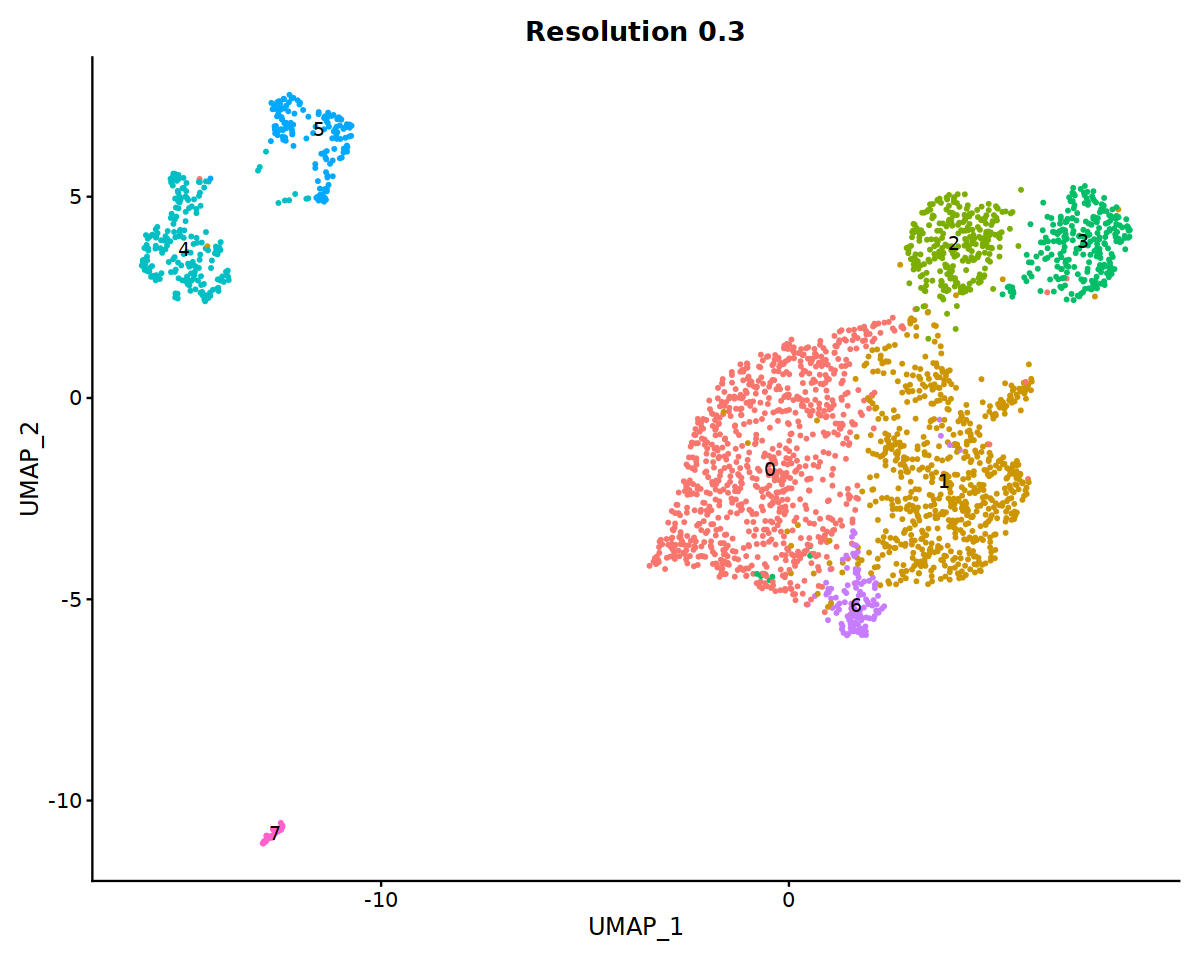

In [9]:
options(repr.plot.width = 10, repr.plot.height = 8, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))

In [10]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct=0.1, 
                              logfc.threshold=0.1, 
                              random.seed=0, 
                              max.cells.per.ident=1000,
                              only.pos=TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



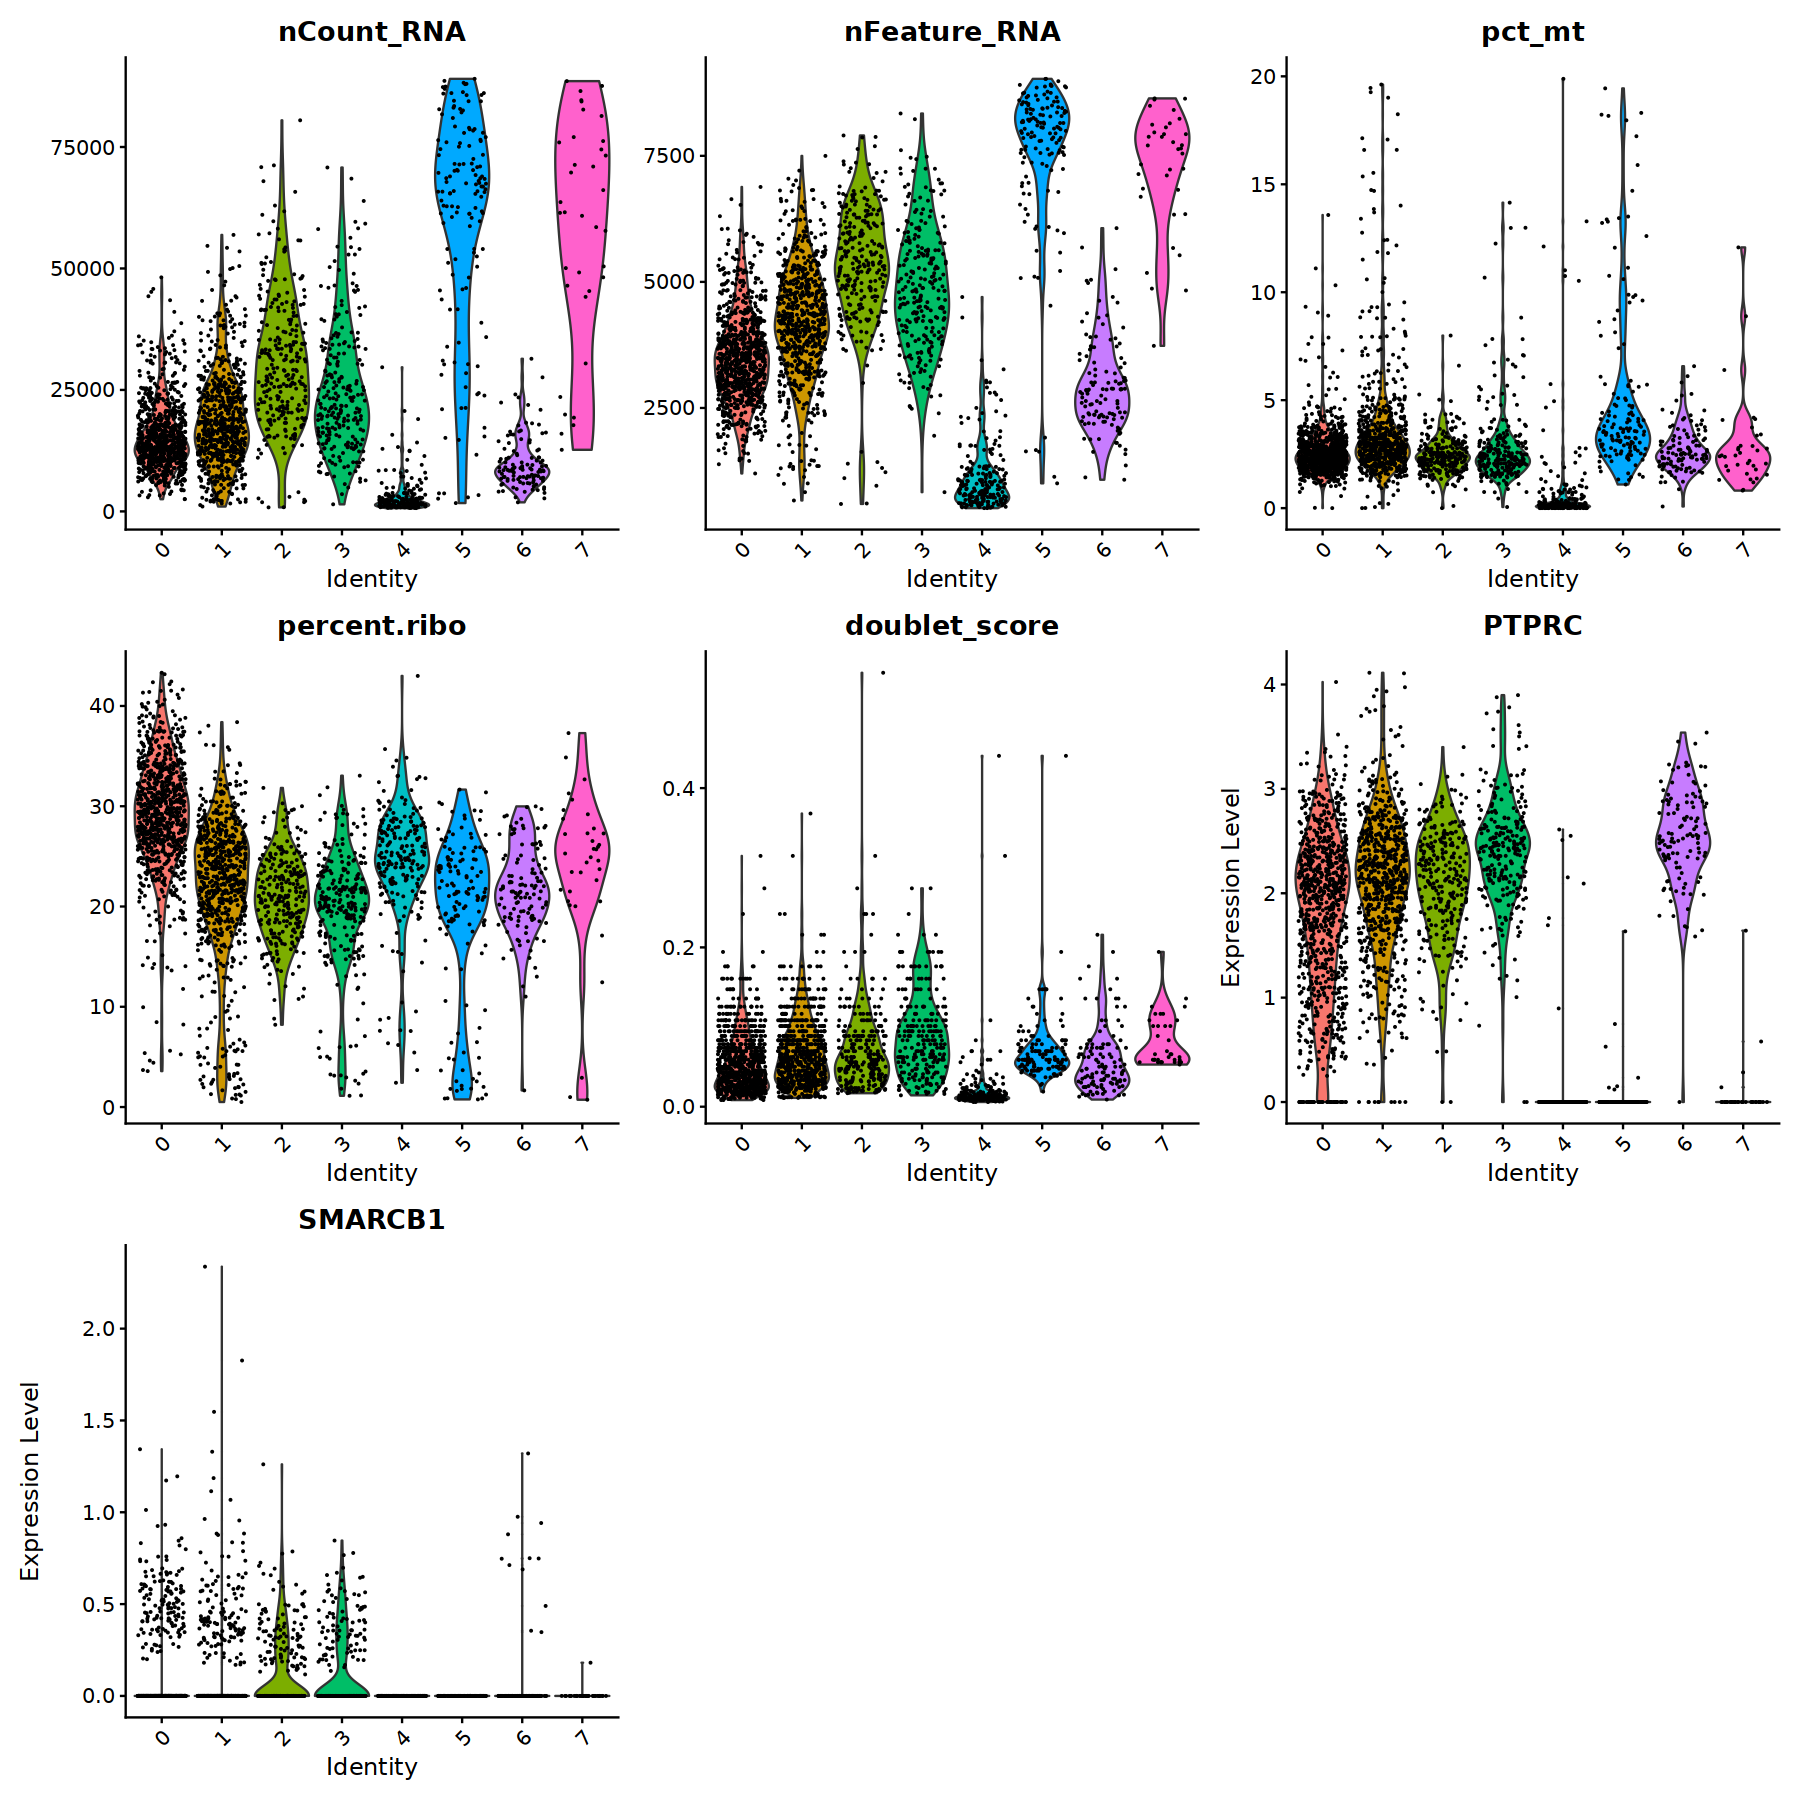

In [11]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "SMARCB1")

VlnPlot(seurat_obj, 
            feature=con_vars, ncol=3)

low quality cells and tumor cells 

In [12]:
c <- 4

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster gene   
MT1A    1.235569e-58 3.718427   0.610 0.170 3.397940e-54 4       MT1A   
MT1M    2.039135e-47 3.066562   0.457 0.095 5.607826e-43 4       MT1M   
CRABP2  8.507199e-97 2.997161   0.757 0.163 2.339565e-92 4       CRABP2 
S100A6  1.566494e-83 2.912869   0.952 0.959 4.308015e-79 4       S100A6 
S100A13 2.144996e-74 2.824547   0.690 0.172 5.898953e-70 4       S100A13
H19     5.035925e-65 2.775190   0.629 0.144 1.384930e-60 4       H19    
SPARC   9.069393e-55 2.490860   0.533 0.113 2.494174e-50 4       SPARC  
TPM2    1.583245e-82 2.482773   0.700 0.145 4.354082e-78 4       TPM2   
S100A4  3.783906e-71 2.388664   0.948 0.904 1.040612e-66 4       S100A4 
ALDH7A1 1.116751e-77 2.371434   0.681 0.147 3.071176e-73 4       ALDH7A1
MT1X    9.857812e-15 2.347267   0.590 0.590 2.710997e-10 4       MT1X   
NQO1    1.756918e-37 2.328306   0.586 0.281 4.831700e-33 4       NQO1   
KCNE5   6.199843e-32 2.319006   0.348 0.074 1.705019e-27 4       KCNE5  
TIMP1   1.003294e-14 2.278246   0.581 0.472 2.759159e-10 4       TIMP1  
BEX3    7.004712e-53 2.168029   0.562 0.138 1.926366e-48 4       BEX3   
S100A1  4.890949e-47 2.047239   0.462 0.101 1.345060e-42 4       S100A1 
MYL9    6.194620e-56 2.037090   0.552 0.128 1.703582e-51 4       MYL9   
STAR    4.429459e-40 2.026551   0.376 0.069 1.218146e-35 4       STAR   
MT2A2   5.974593e-35 2.003499   0.848 0.905 1.643073e-30 4       MT2A   
DMKN    1.537096e-32 1.979797   0.352 0.073 4.227167e-28 4       DMKN

In [13]:
c <- 5

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster gene    
AUTS2     3.427188e-151 3.572508   0.979 0.082 9.425111e-147 5       AUTS2   
TENM3     7.970596e-214 3.090579   0.993 0.024 2.191994e-209 5       TENM3   
PAX31     7.596863e-176 2.991003   0.993 0.065 2.089213e-171 5       PAX3    
COL1A11   4.631116e-157 2.981533   0.993 0.078 1.273603e-152 5       COL1A1  
HMGA21    5.730689e-155 2.849922   0.986 0.076 1.575997e-150 5       HMGA2   
RAD51B     2.934151e-60 2.849407   0.979 0.605  8.069207e-56 5       RAD51B  
NFIB      4.909380e-186 2.849373   0.993 0.049 1.350129e-181 5       NFIB    
COL6A31   1.545450e-150 2.675230   0.993 0.096 4.250142e-146 5       COL6A3  
EYA41     1.463717e-219 2.585681   1.000 0.020 4.025369e-215 5       EYA4    
PDE4D      4.245441e-63 2.573902   0.986 0.584  1.167539e-58 5       PDE4D   
GPC5      2.290940e-182 2.515253   0.957 0.032 6.300314e-178 5       GPC5    
FGFBP21    2.444806e-95 2.422069   0.901 0.178  6.723460e-91 5       FGFBP2  
PAPPA     4.143382e-212 2.383888   0.965 0.020 1.139472e-207 5       PAPPA   
APOE1     3.617106e-127 2.381398   0.908 0.085 9.947403e-123 5       APOE    
SPARC1    5.557987e-136 2.362110   0.972 0.100 1.528502e-131 5       SPARC   
VCL        1.043515e-81 2.351972   0.993 0.442  2.869771e-77 5       VCL     
PEG31     1.481621e-159 2.348188   0.986 0.089 4.074607e-155 5       PEG3    
SERPINH11  6.977823e-97 2.313999   0.972 0.210  1.918971e-92 5       SERPINH1
TCF7L21   2.872225e-172 2.265072   0.986 0.061 7.898906e-168 5       TCF7L2  
ALDH7A11  2.636800e-126 2.256447   0.993 0.144 7.251465e-122 5       ALDH7A1

In [14]:
c <- 7

rna.markers %>% 
  dplyr::filter(cluster == c) %>% 
  arrange(desc(avg_log2FC)) %>% head(n=20)

p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster
GCG         4.555628e-126 5.257423   1.000 0.029 1.252843e-121 7      
IGFBP5      8.373427e-132 4.013395   1.000 0.027 2.302776e-127 7      
GPC51        5.763822e-76 3.919963   0.972 0.070  1.585109e-71 7      
KRT28       1.627086e-138 3.804636   0.833 0.011 4.474650e-134 7      
AFF3        1.540021e-179 3.480811   1.000 0.011 4.235211e-175 7      
AKAP6       5.548016e-196 3.329266   1.000 0.007 1.525760e-191 7      
ALDH1A1      1.182078e-52 3.296481   0.389 0.011  3.250834e-48 7      
LINC01915   1.432489e-199 3.259926   1.000 0.005 3.939488e-195 7      
COL5A22      9.306973e-65 3.236627   1.000 0.100  2.559511e-60 7      
HHIP        1.169686e-191 3.184405   1.000 0.007 3.216755e-187 7      
TPM11        1.904037e-80 3.073356   0.972 0.066  5.236292e-76 7      
MYL92        6.657438e-46 3.047513   1.000 0.151  1.830862e-41 7      
MEOX22       8.586067e-77 2.946198   1.000 0.074  2.361254e-72 7      
MDK2         1.847926e-40 2.841314   0.972 0.168  5.081982e-36 7      
CRABP1       1.192600e-20 2.699367   0.167 0.007  3.279770e-16 7      
AUTS21       2.004906e-52 2.684637   1.000 0.119  5.513691e-48 7      
CRABP22      5.287506e-31 2.677030   0.917 0.202  1.454117e-26 7      
TMTC2       1.509379e-109 2.608232   0.972 0.042 4.150943e-105 7      
ZFHX31       3.077825e-46 2.603050   1.000 0.169  8.464327e-42 7      
AC013287.11  6.674852e-68 2.572721   0.806 0.051  1.835651e-63 7      
            gene      
GCG         GCG       
IGFBP5      IGFBP5    
GPC51       GPC5      
KRT28       KRT28     
AFF3        AFF3      
AKAP6       AKAP6     
ALDH1A1     ALDH1A1   
LINC01915   LINC01915 
COL5A22     COL5A2    
HHIP        HHIP      
TPM11       TPM1      
MYL92       MYL9      
MEOX22      MEOX2     
MDK2        MDK       
CRABP1      CRABP1    
AUTS21      AUTS2     
CRABP22     CRABP2    
TMTC2       TMTC2     
ZFHX31      ZFHX3     
AC013287.11 AC013287.1

### Remove Cells

Clusters being removed show non-related Tcell markers

In [15]:
seurat_obj <- subset(x = seurat_obj, idents=c(4,5,7), invert=TRUE)

In [16]:
seurat_obj <- DietSeurat(
  seurat_obj,
  counts = TRUE,
  data = TRUE,
  scale.data = FALSE,
  features = NULL,
  assays = NULL,
  dimreducs = FALSE,
  graphs = NULL
)

In [17]:
print(table(rowSums(as.matrix(seurat_obj[['RNA']]@counts)) == 0))
  
keep_genes <- data.frame(rowSums(as.matrix(seurat_obj[['RNA']]@counts)) != 0)
colnames(keep_genes) <- "logical"
keep_genes <- subset(keep_genes, logical==TRUE)
seurat_obj[['RNA']]@counts <- seurat_obj[['RNA']]@counts[rownames(keep_genes), ]
seurat_obj[['RNA']]@data <- seurat_obj[['RNA']]@data[rownames(keep_genes), ]
seurat_obj


FALSE  TRUE 
24040  3461 


An object of class Seurat 
24040 features across 2179 samples within 1 assay 
Active assay: RNA (24040 features, 0 variable features)

## Re-do embedding and clustering

In [18]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [19]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 24040 2179 
metadata(0):
assays(2): counts logcounts
rownames(24040): AL627309.1 AL627309.5 ... AC004556.3 AC007325.2
rowData names(0):
colnames(2179): AAACCTGAGTGCCAGA-1 AAACCTGAGTTAACGA-1 ...
  TTTGTCAGTTGTGGAG-1 TTTGTCATCCTATGTT-1
colData names(18): orig.ident nCount_RNA ... seurat_clusters ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

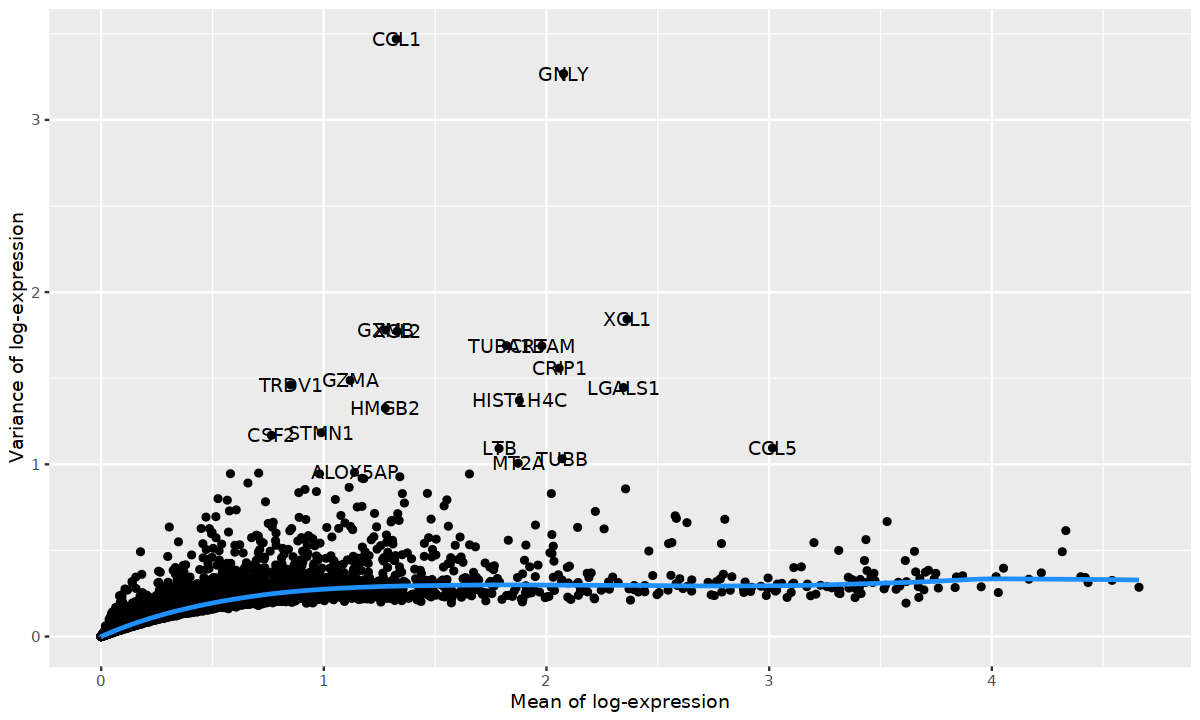

In [20]:
options(repr.plot.width = 10, repr.plot.height = 6, warn=-1,verbose = FALSE)
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [21]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.05)
length(hvgs)

[1] 1104

In [22]:
# remove TCR genes
hvgs <- hvgs[!grepl("^TR[AB][VJC]", hvgs)]
length(hvgs)

VariableFeatures(seurat_obj) <- hvgs

[1] 1009

In [23]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  NUSAP1, TOP2A, MKI67, NCAPG, UBE2C, KIFC1, TPX2, CDK1, HMGB2, GTSE1 
	   STMN1, ASPM, RRM2, CENPF, KNL1, CDCA8, KIF15, AURKB, SPC25, HJURP 
	   CDCA3, NDC80, BIRC5, CDCA2, BUB1, CKAP2L, PRC1, HIST1H1B, DLGAP5, DIAPH3 
Negative:  LTB, CD27, CD7, TMEM120A, TAGAP, GZMM, BTG2, HCST, MYC, CRTAM 
	   ISG20, DDX21, FCMR, TNFSF14, HIVEP3, HSP90AB1, REL, IL21R, MALAT1, FTL 
	   XCL1, GADD45B, SPOCK2, TNFRSF9, TIMP1, BCL2L1, BACH2, IL4I1, CD79A, PLAC8 
PC_ 2 
Positive:  PTPRC, AOAH, SLFN5, FYB1, PLAAT4, CCL5, LINC01871, PYHIN1, GIMAP4, LAPTM5 
	   ARHGAP15, CBLB, LYST, TXNIP, ALOX5AP, RIPOR2, DAPK2, IGFLR1, GNLY, ASB2 
	   PDE3B, PDE7B, SPTAN1, GIMAP7, ENTPD1, SIRPG, ZBTB20, THEMIS, ITGA1, TRG-AS1 
Negative:  HSP90AB1, NME1, HSPE1, HSPD1, PA2G4, NOLC1, DDX21, FABP5, HSPA8, RAN 
	   HSP90AA1, PRDX1, MIR155HG, SDC4, BCL2L1, RPL22L1, MYC, IL21R, HSPA5, LDHA 
	   MIF, CD83, GADD45B, EMP3, SMS, CD82, ENO1, TNFRSF9, CALR, TRAF1 
PC_ 3 
Positive:  TI

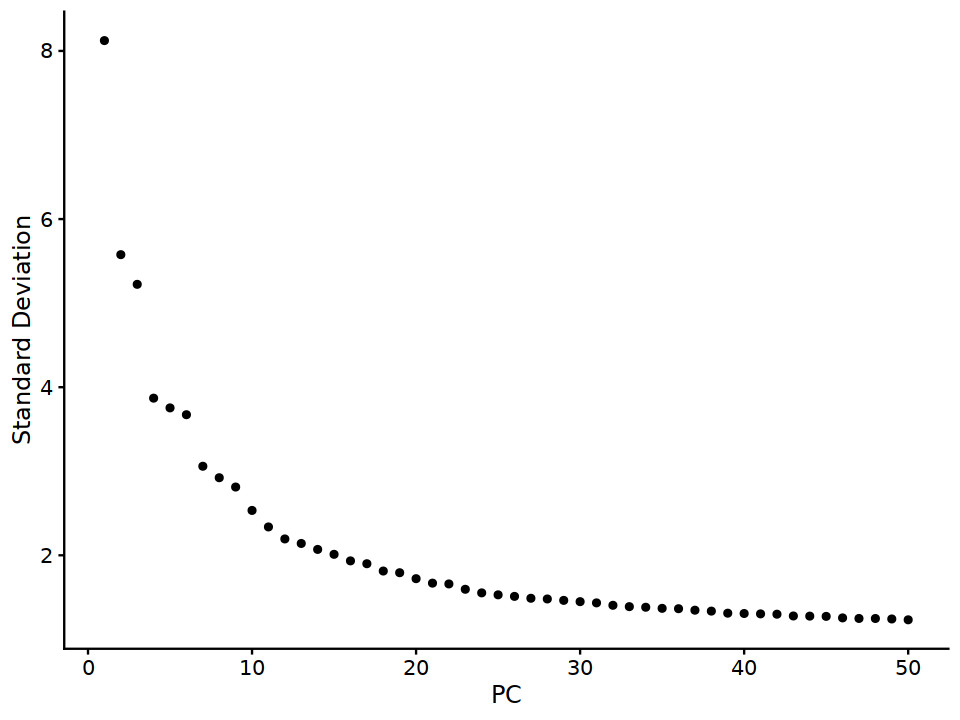

In [24]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

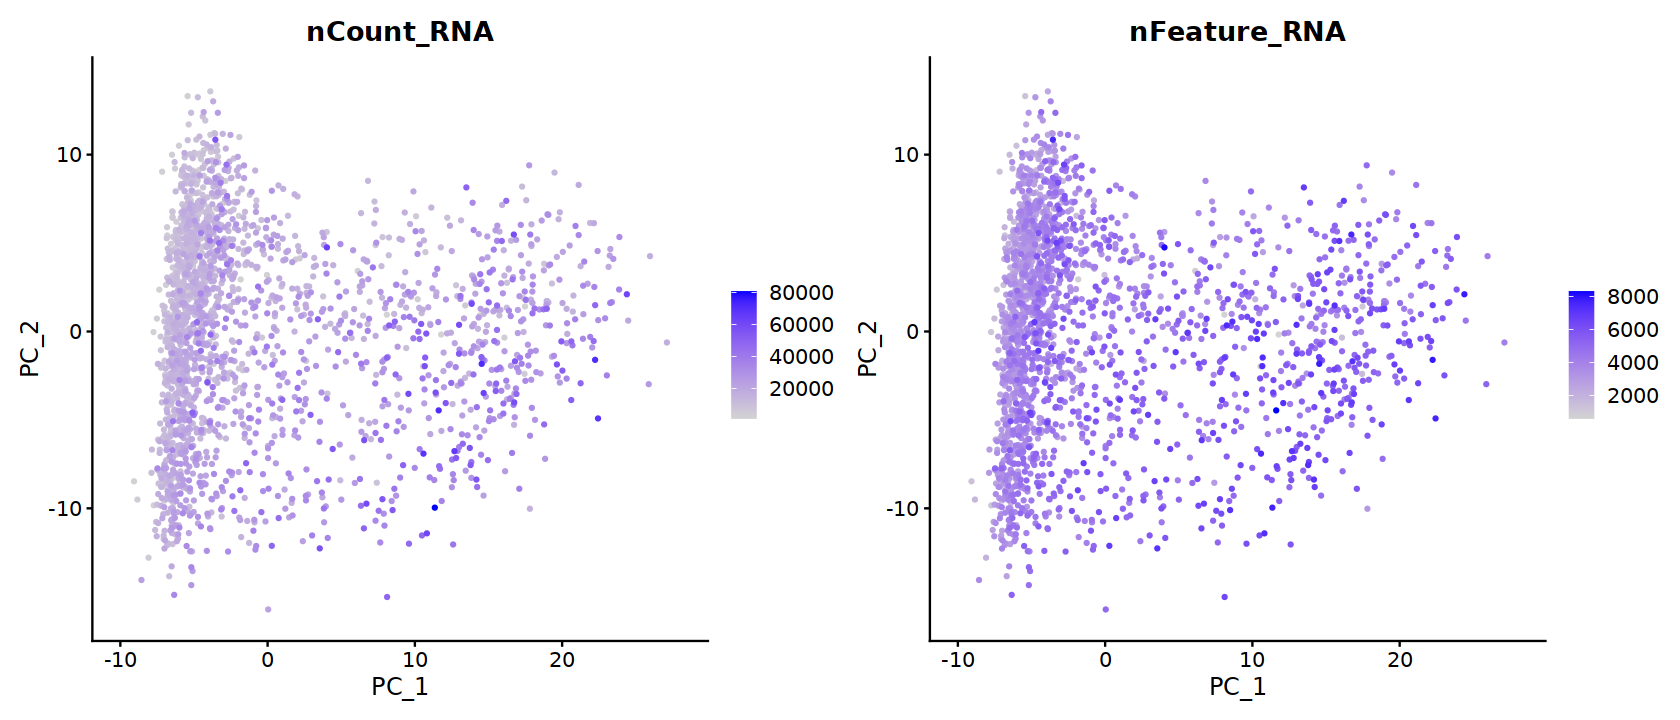

In [25]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

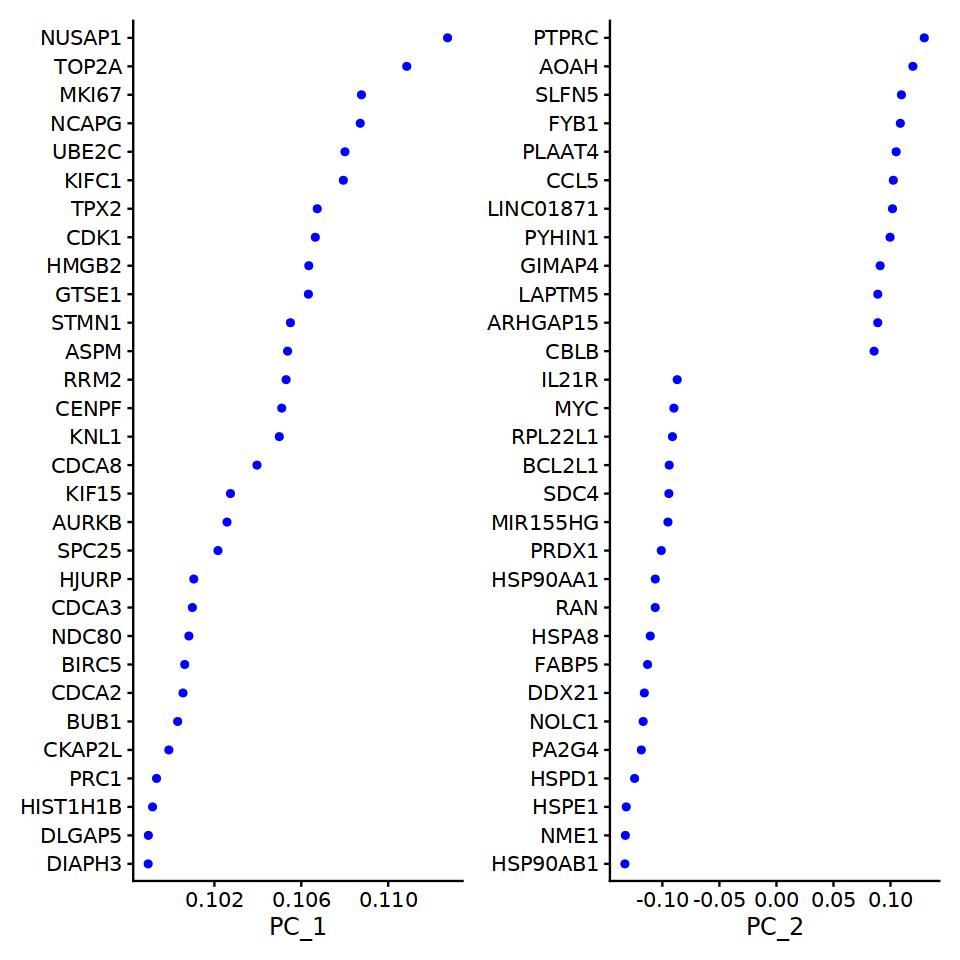

In [26]:
options(repr.plot.width = 8, repr.plot.height = 8, warn=-1,verbose = FALSE)
VizDimLoadings(seurat_obj, dims = 1:2, reduction = "pca")

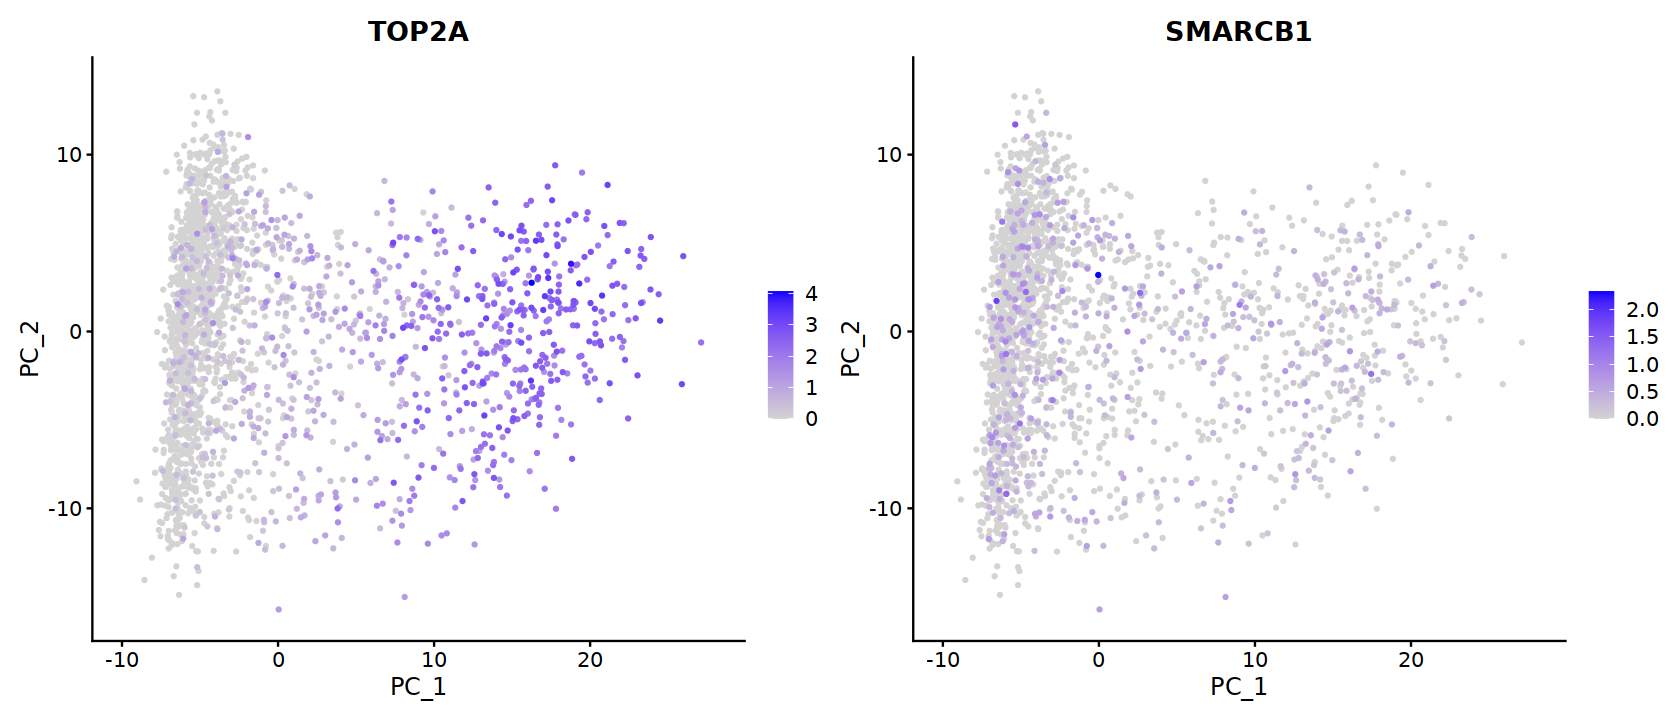

In [27]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("TOP2A","SMARCB1"), order=T)

In [28]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = dcomp,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

10:54:15 UMAP embedding parameters a = 0.9922 b = 1.112

10:54:15 Read 2179 rows and found 12 numeric columns

10:54:15 Using Annoy for neighbor search, n_neighbors = 30

10:54:15 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:54:15 Writing NN index file to temp file /scratch_tmp/34289041/RtmpkMMUav/file14e4a299262e9

10:54:15 Searching Annoy index using 1 thread, search_k = 3000

10:54:16 Annoy recall = 100%

10:54:17 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

10:54:18 Initializing from normalized Laplacian + noise (using irlba)

10:54:18 Commencing optimization for 500 epochs, with 85402 positive edges

10:54:24 Optimization finished



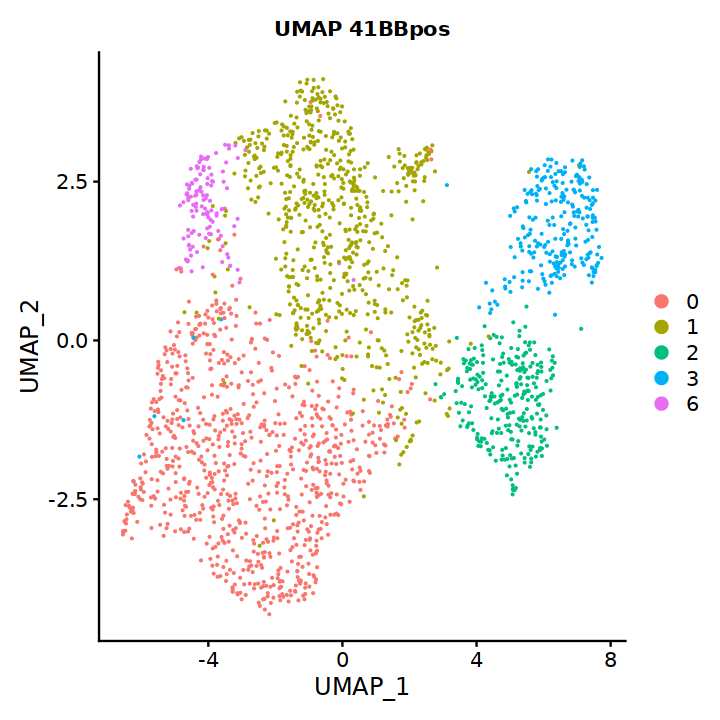

In [29]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  pt.size = 0.1
) + ggtitle(glue('UMAP {sample}')) + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

In [30]:
# Find the K-nearest neighbors
seurat_obj <- FindNeighbors(seurat_obj, reduction = "pca", dims = dcomp)
# Find clusters at different resolutions
clusters_df <- cluster_diff_resolutions(
  seurat_obj = seurat_obj,
  min_resolution = 0.1,
  max_resolution = 1.0,
  step = 0.1
)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2179
Number of edges: 71656

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9246
Number of communities: 2
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2179
Number of edges: 71656

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8884
Number of communities: 5
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2179
Number of edges: 71656

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8633
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2179
Number of edges: 71656

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8449
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer ver

In [31]:
list_plots <- lapply(unique(clusters_df$resolution), function(x) {
  p <- add_reso_results(seurat_obj, clusters_df, resolution=x)
  umap <- DimPlot(p, reduction = "umap", 
                  group.by=glue::glue("seurat_clusters")) +
    labs(title=glue::glue("Resolution {x}"))
  return(umap)
})

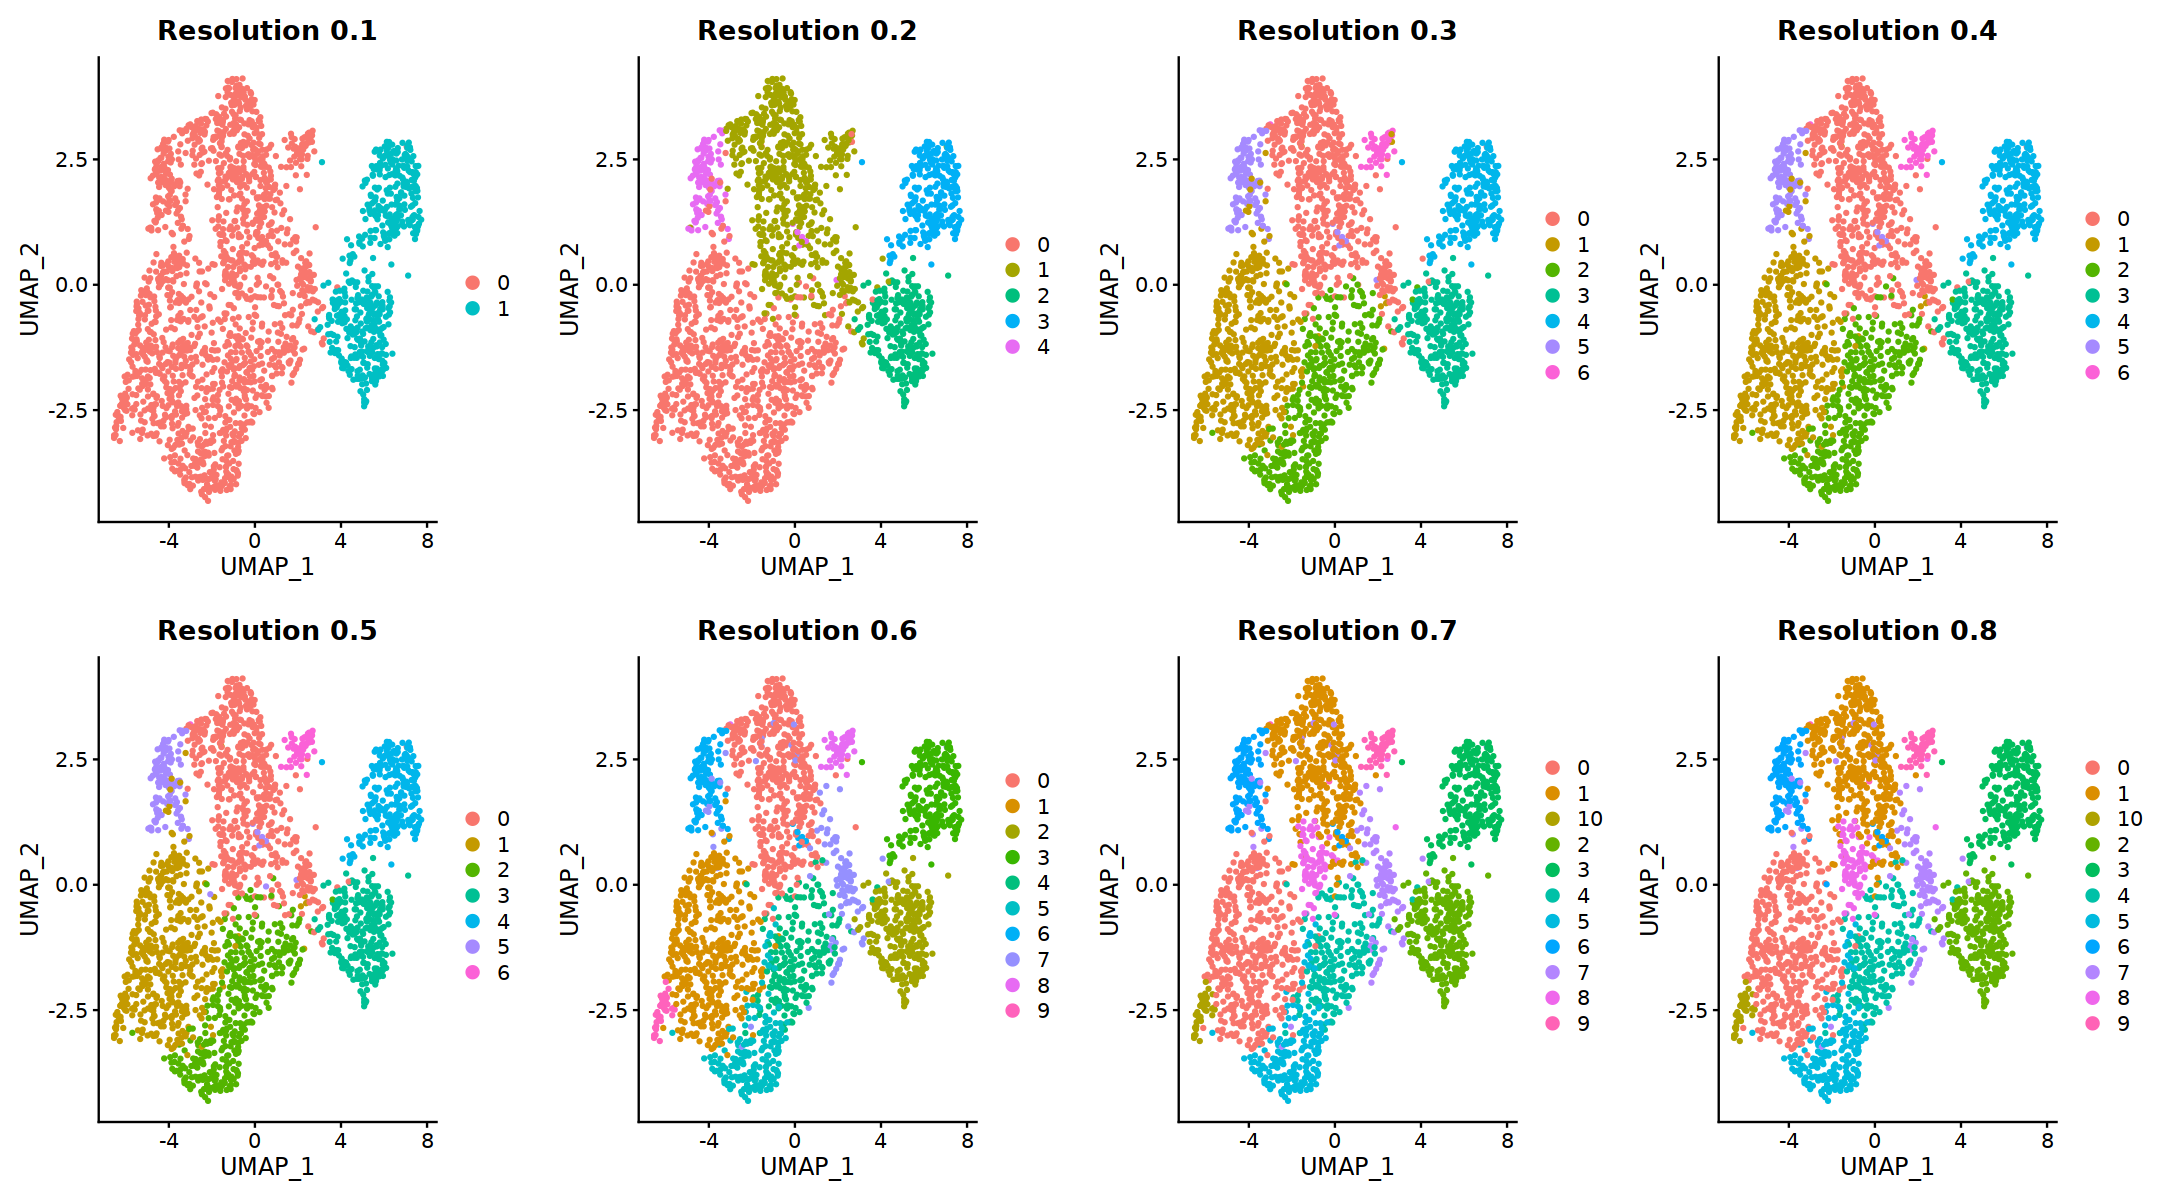

In [32]:
options(repr.plot.width = 18, repr.plot.height = 10, warn=-1,verbose = FALSE)
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol=4,
                   nrow=2)
cp

In [33]:
reso = 0.8

In [34]:
seurat_obj <- FindClusters(seurat_obj, resolution = reso)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2179
Number of edges: 71656

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7836
Number of communities: 11
Elapsed time: 0 seconds


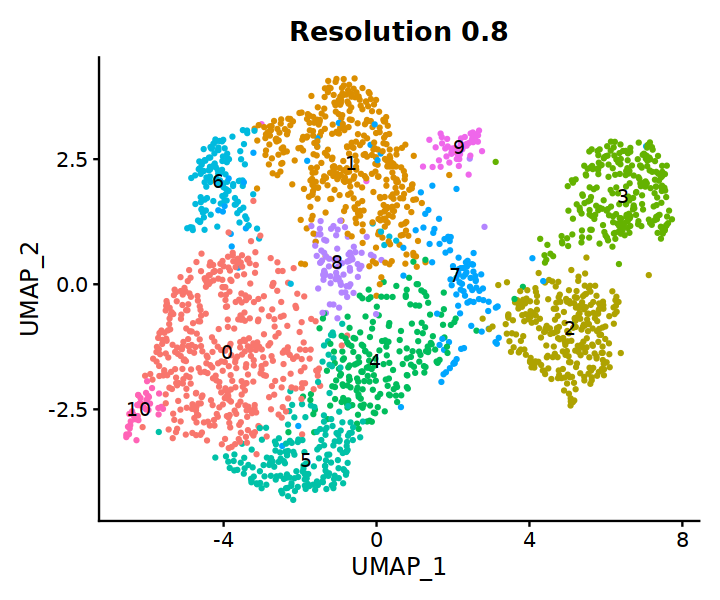

In [35]:
options(repr.plot.width = 6, repr.plot.height = 5, warn=-1,verbose = FALSE)
DimPlot(seurat_obj, reduction = "umap", label = T)+ NoLegend() +
  labs(title=glue("Resolution {reso}")) + theme(plot.title = element_text(hjust = 0.5))

In [36]:
cat_vars <-c("Phase")
con_vars <- c("TOP2A","STMN1","CD3E", "CD3D",
              "CD4", "CD8A","CD8B","SELL","IL7R", 
              "CCL5", "GZMB")
vars <- c(cat_vars, con_vars)

In [37]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, 
                       order = TRUE)
  }
  return(p)
})

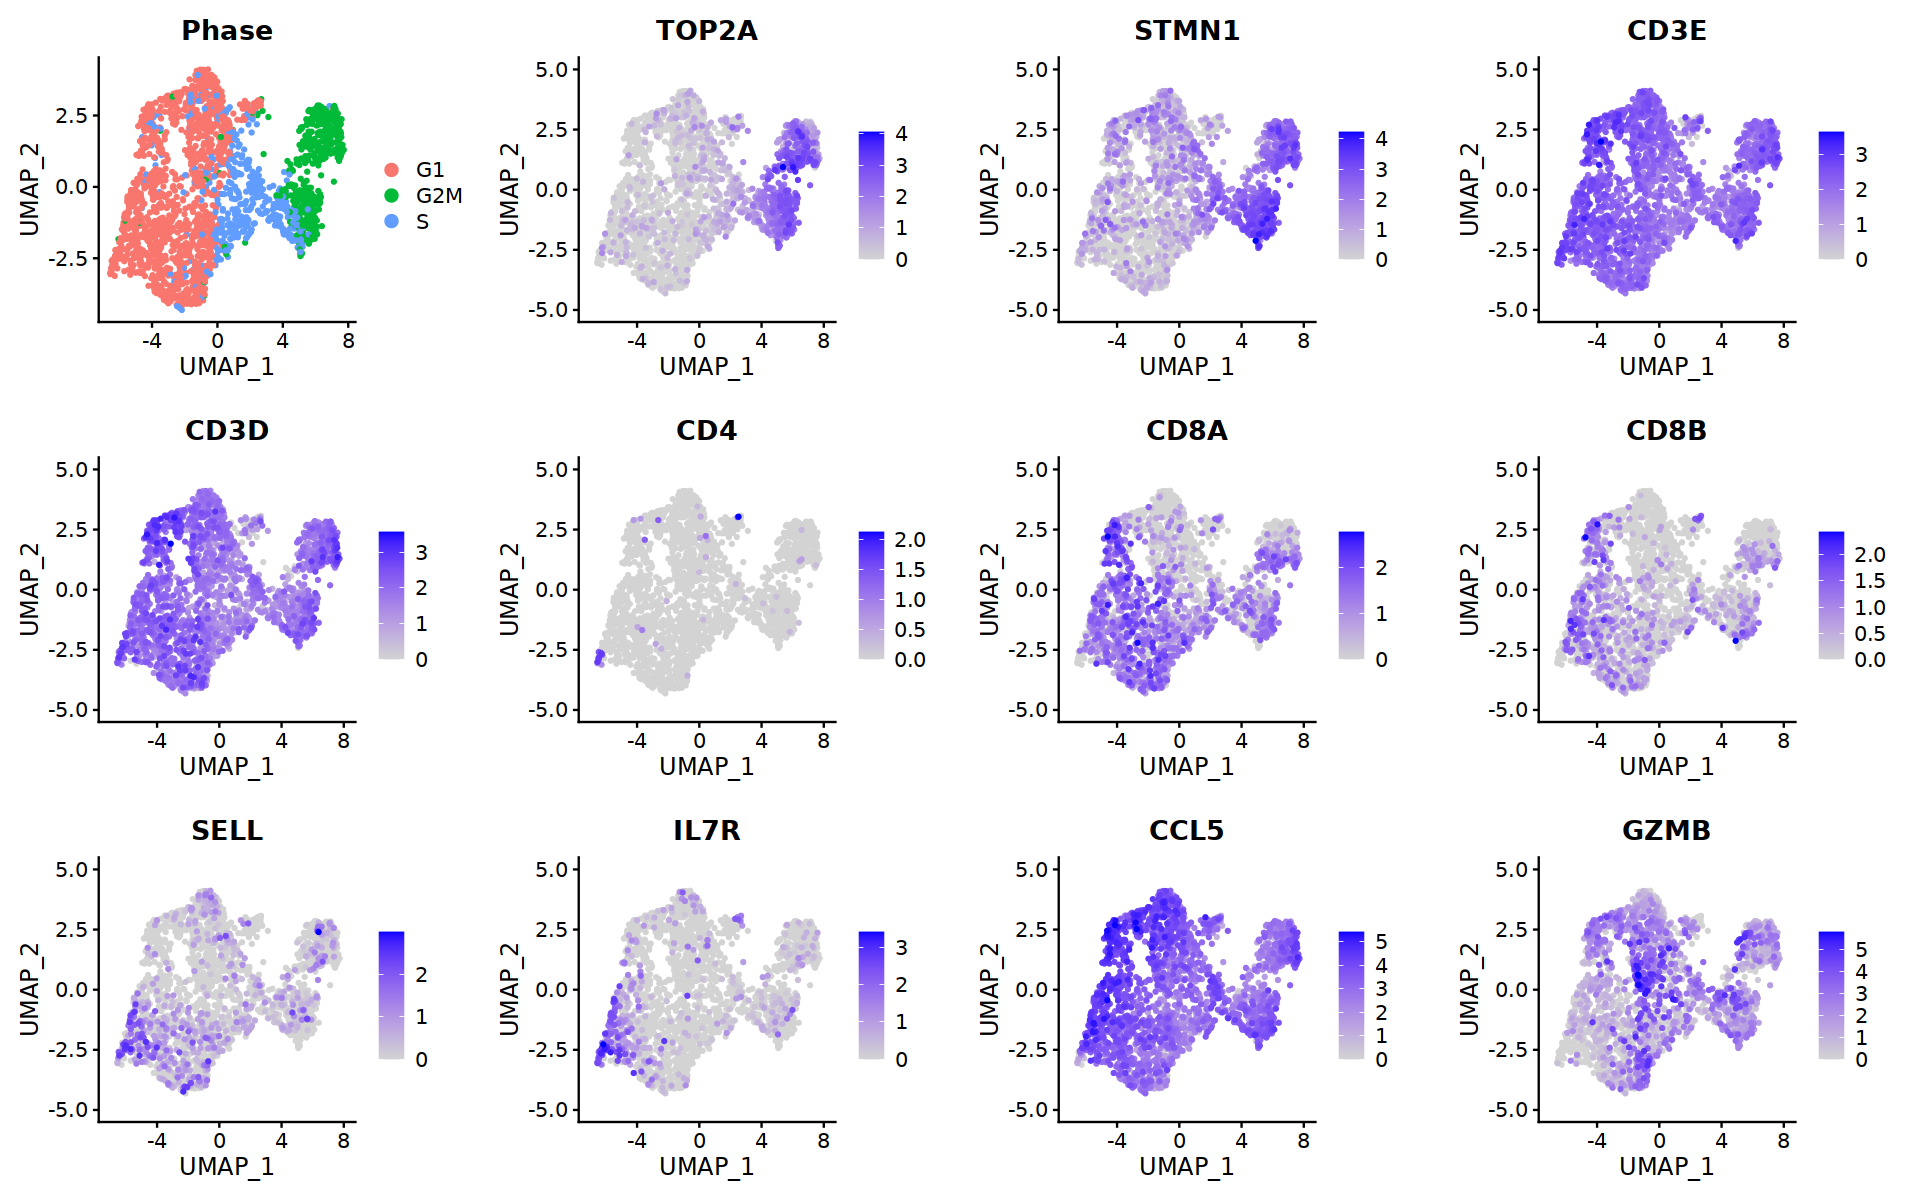

In [38]:
options(repr.plot.width = 16, repr.plot.height = 10, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 3)
cp

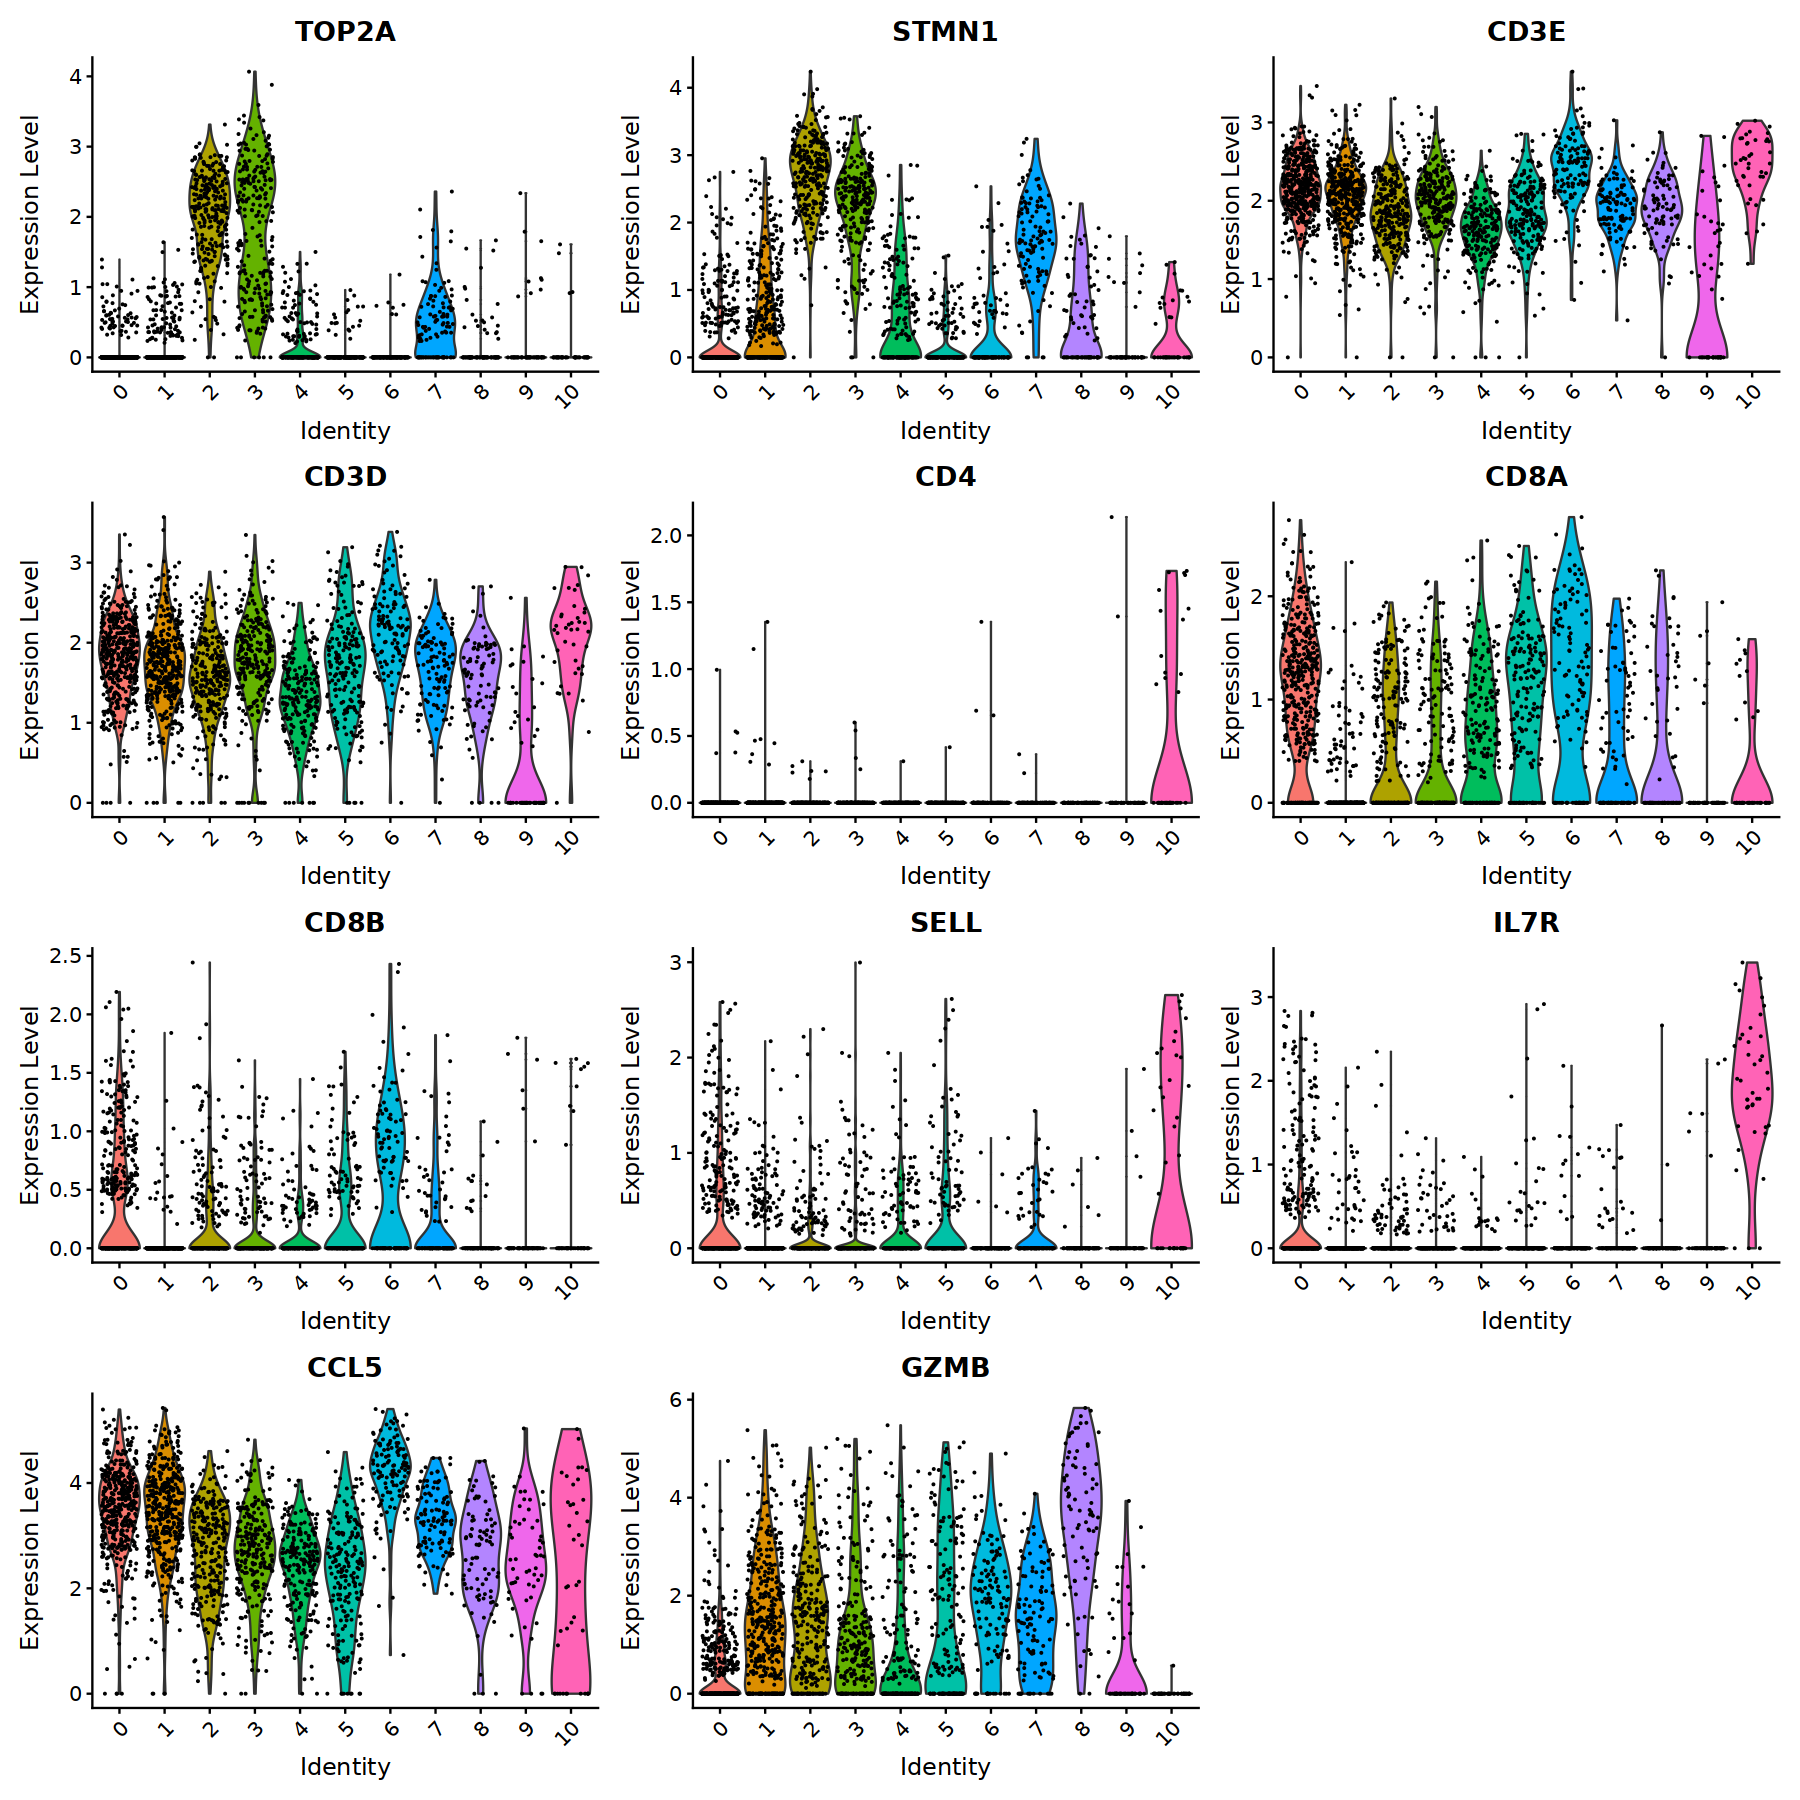

In [39]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

VlnPlot(seurat_obj, 
            feature=con_vars, ncol=3)

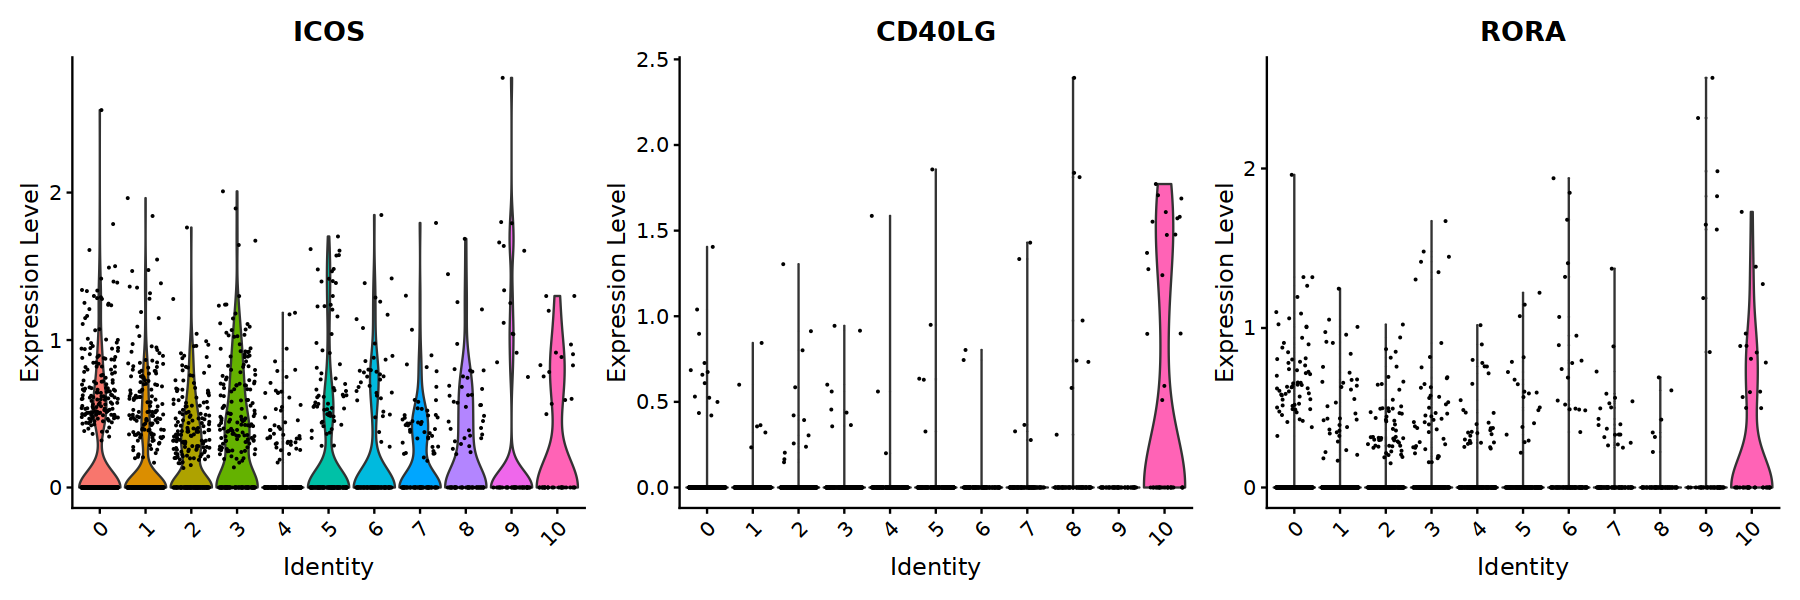

In [40]:
options(repr.plot.width = 15, repr.plot.height = 5, warn=-1,verbose = FALSE)

VlnPlot(seurat_obj, 
            feature=c("ICOS", "CD40LG", "RORA"), ncol=3)

In [41]:
seurat_obj$clusters <- Idents(seurat_obj)

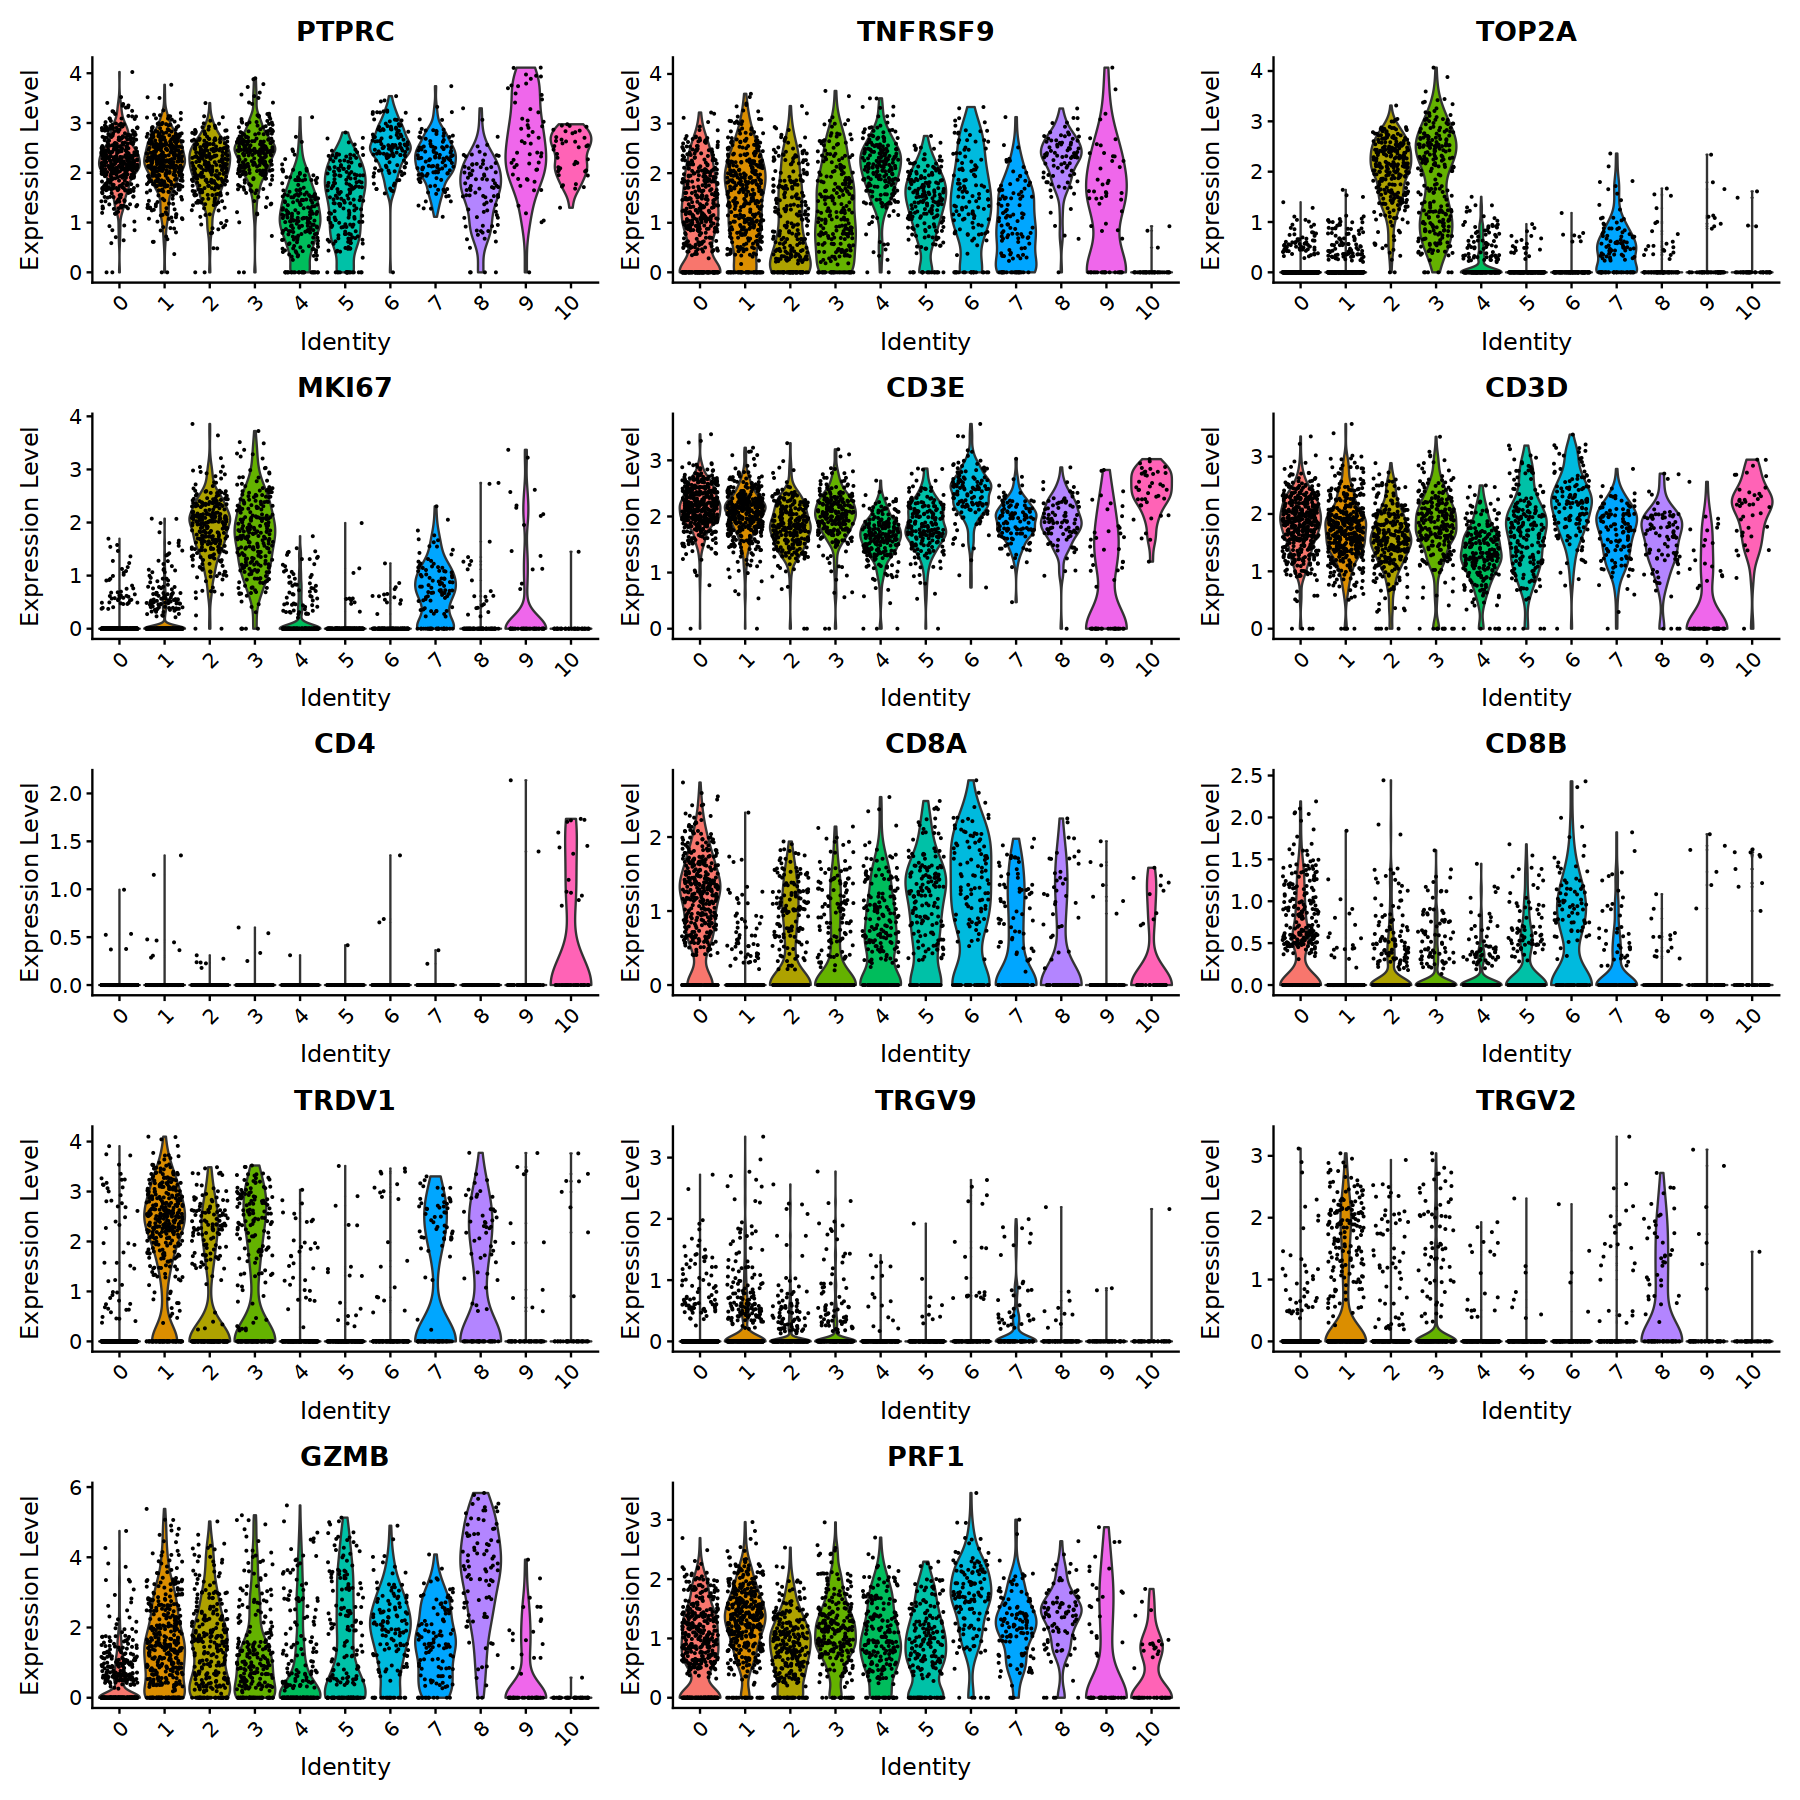

In [42]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

genes <- c("PTPRC","TNFRSF9","TOP2A", "MKI67","CD3E", "CD3D",
           "CD4", "CD8A","CD8B", "TRDV1","TRGV9","TRGV2", "GZMB", "PRF1")

VlnPlot(seurat_obj, 
            feature=genes, ncol=3)

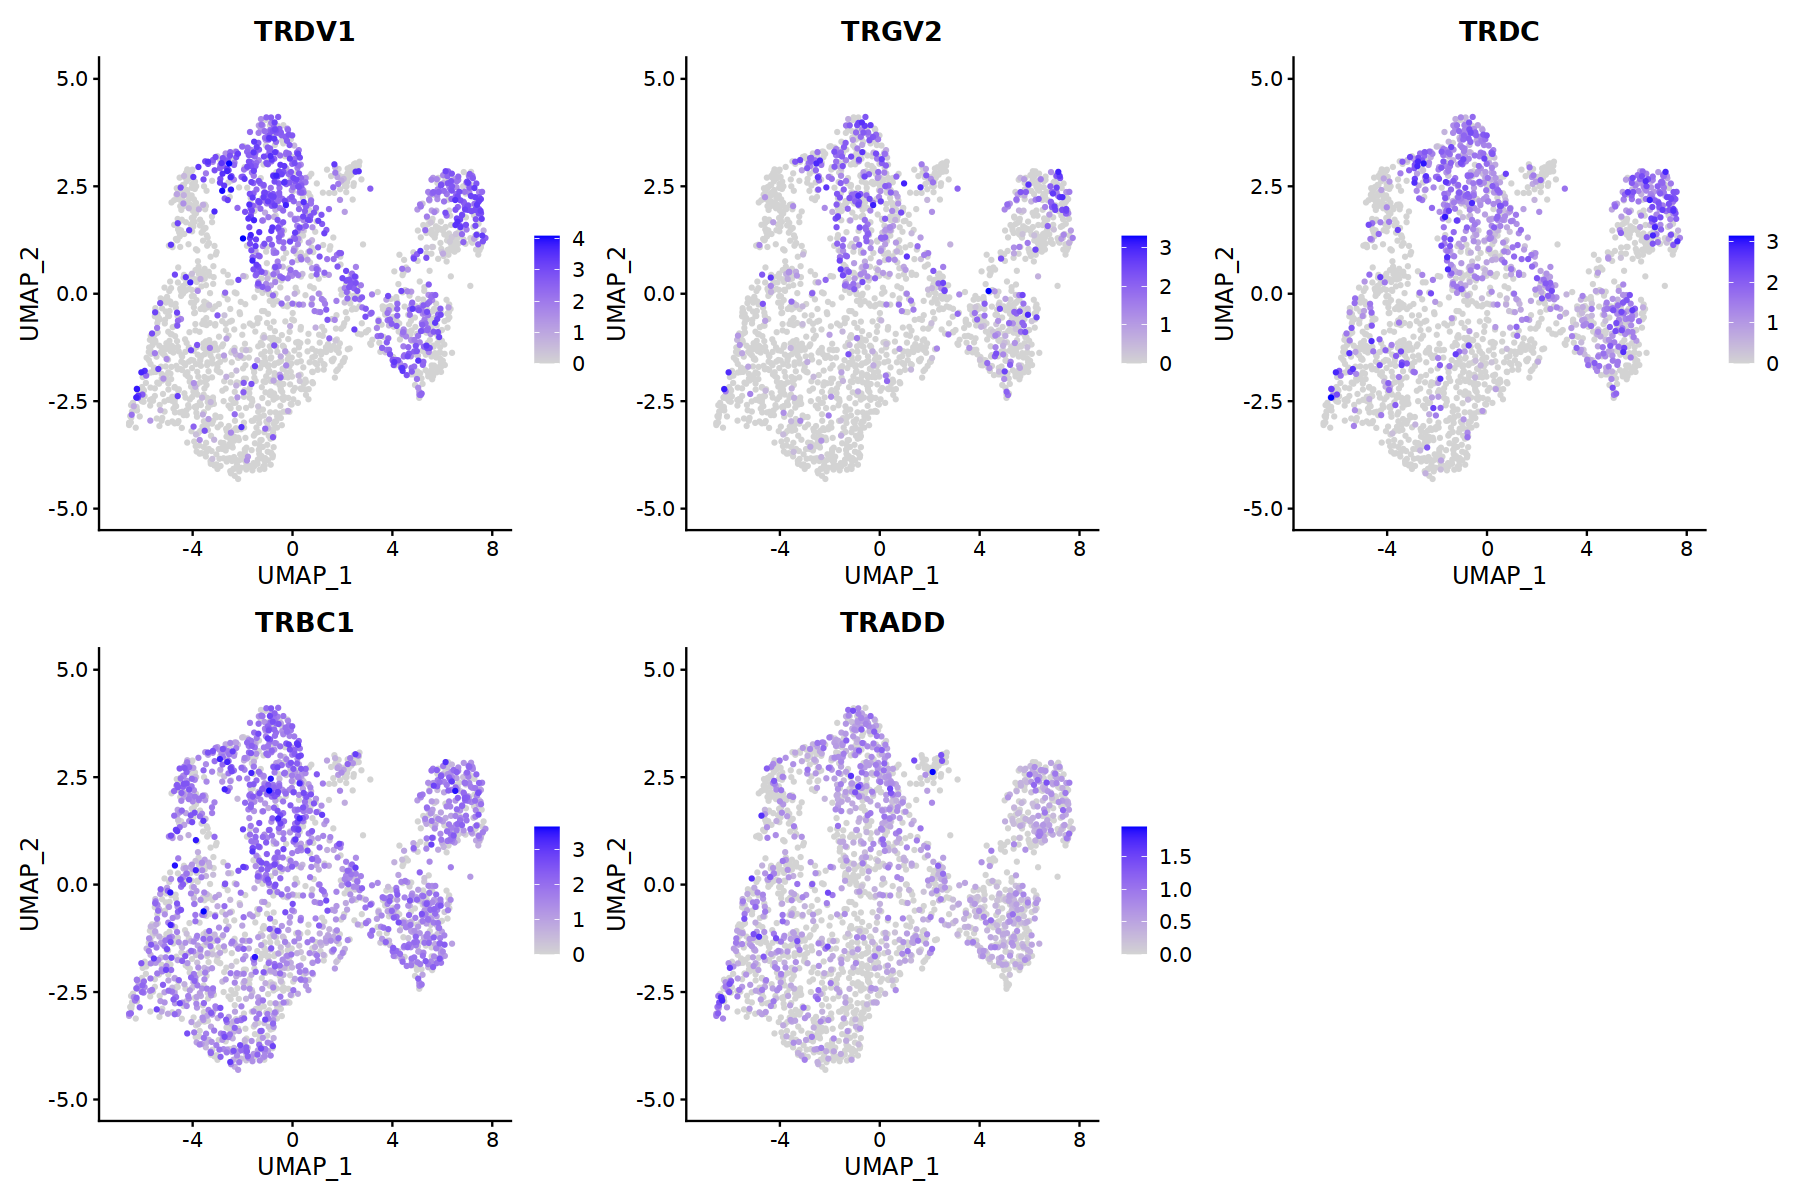

In [44]:
options(repr.plot.width = 15, repr.plot.height = 10, warn=-1,verbose = FALSE)
FeaturePlot(seurat_obj, reduction = "umap", 
            feature=c("TRDV1", "TRGV2", "TRDC",
                      "TRBC1", "TRADD"), order = T, ncol=3)

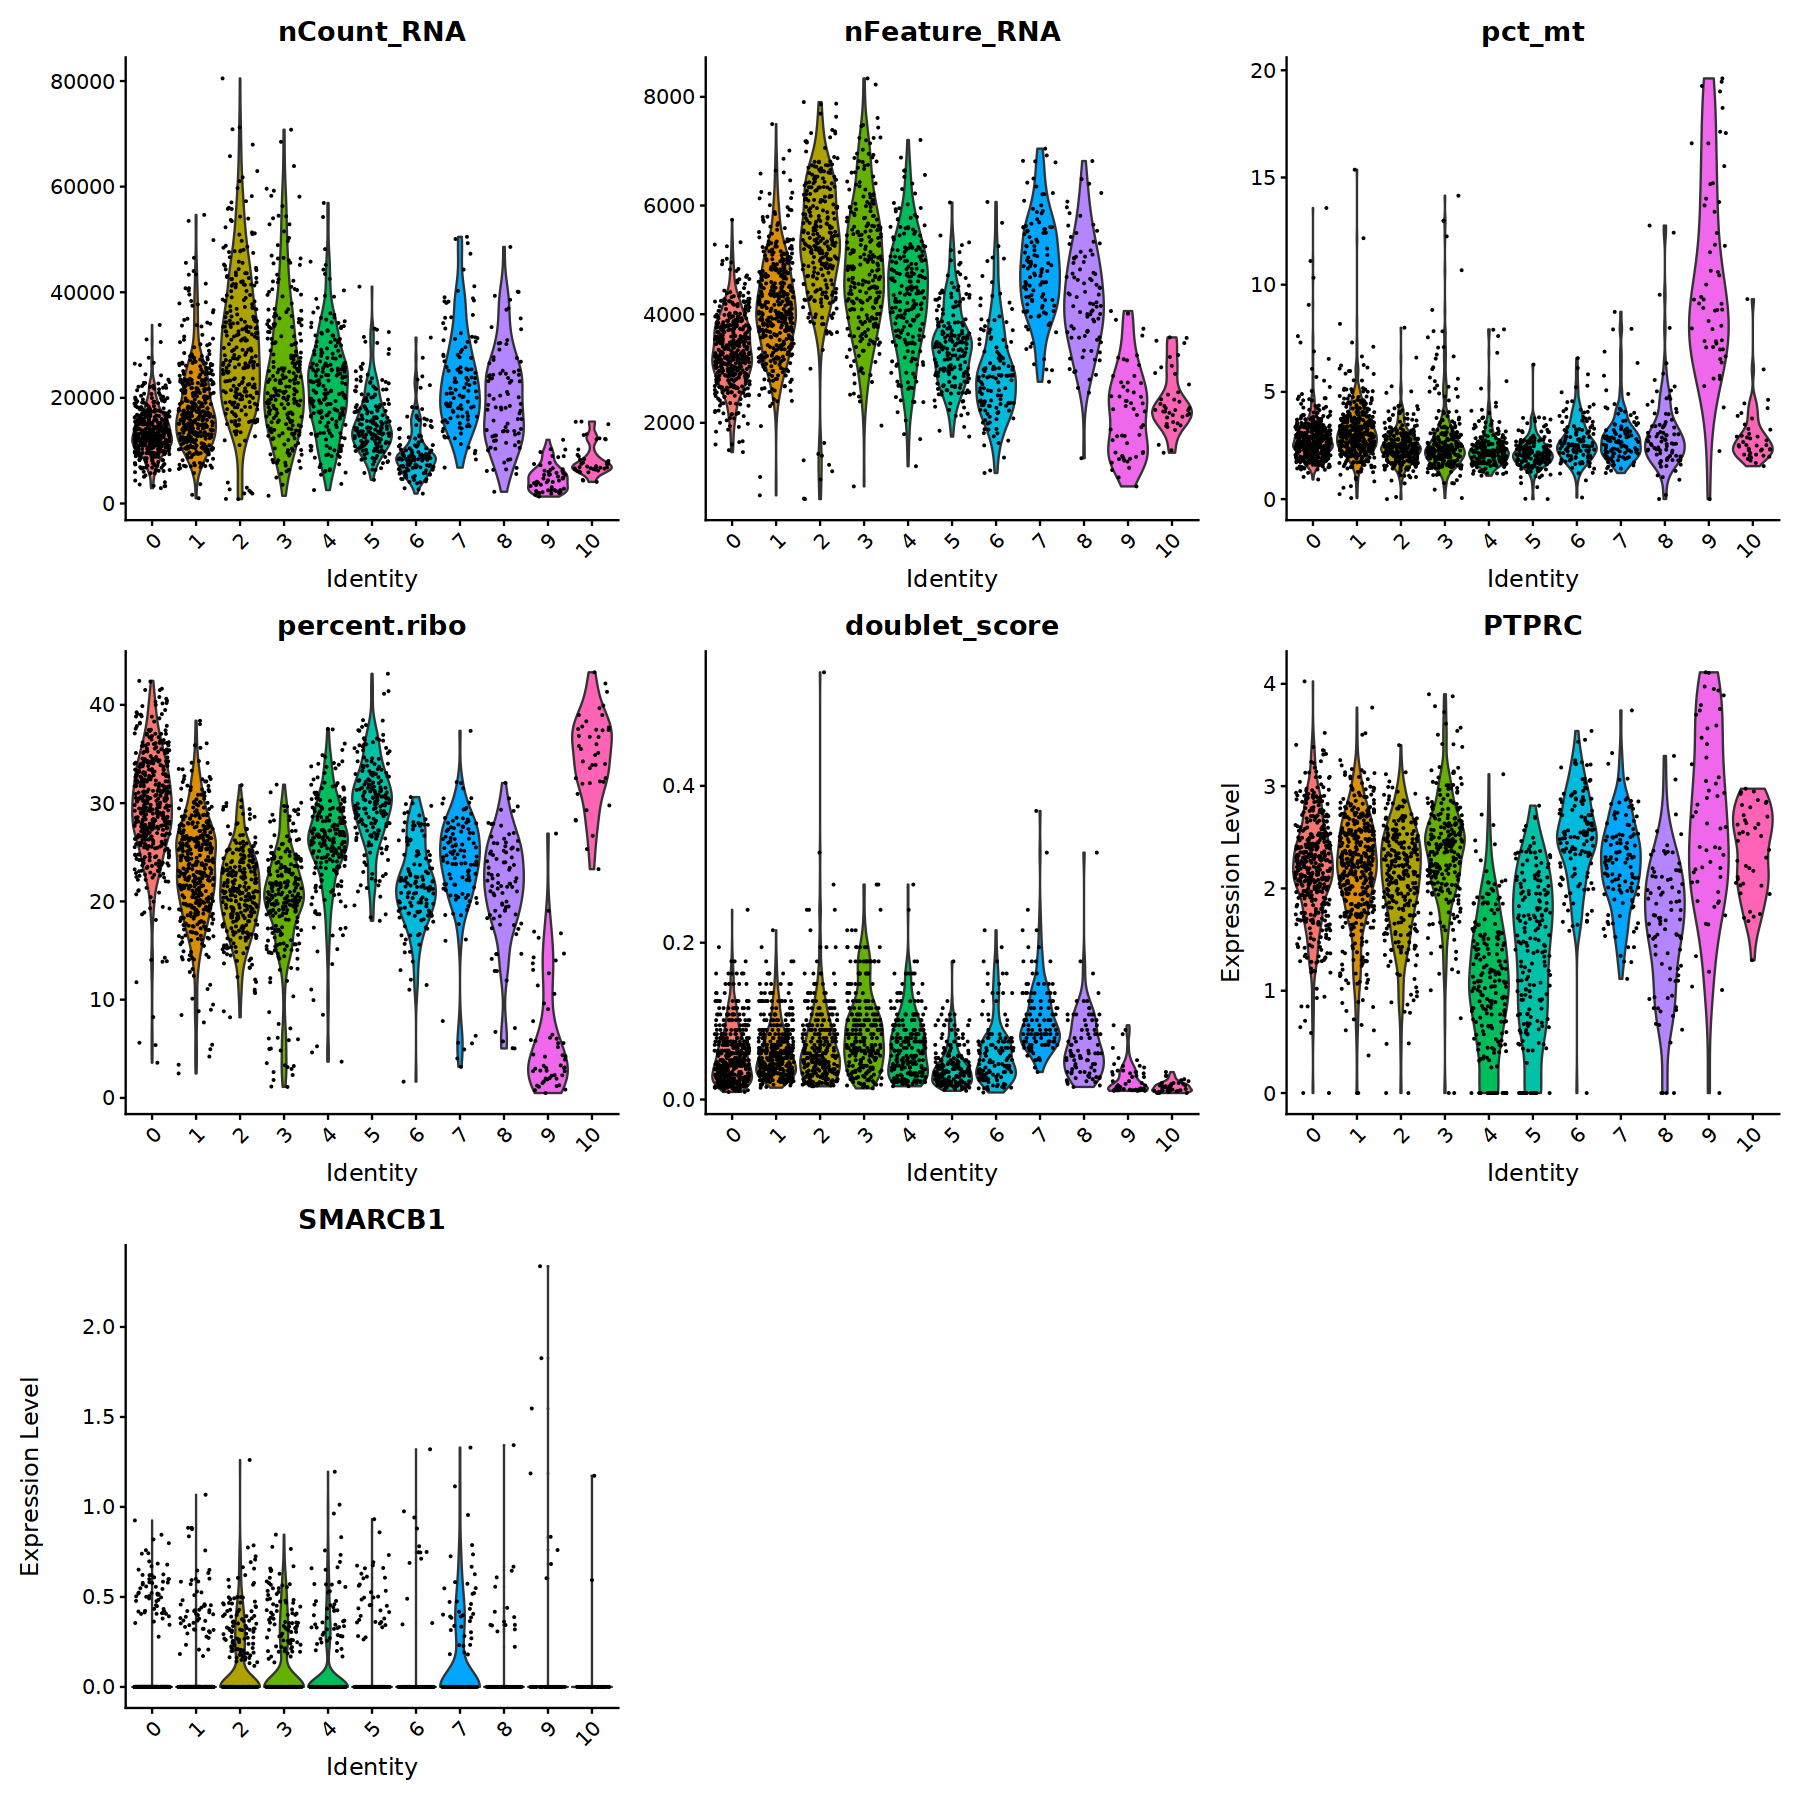

In [45]:
options(repr.plot.width = 15, repr.plot.height = 15, warn=-1,verbose = FALSE)

con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "SMARCB1")

VlnPlot(seurat_obj, 
            feature=con_vars, ncol=3)

In [46]:
rna.markers <- FindAllMarkers(seurat_obj, min.pct = 0.1, 
                              logfc.threshold = 0.1, only.pos = T,
                              random.seed=0, max.cells.per.ident=1000)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10



In [48]:
rna.markers <- rna.markers %>% 
  dplyr::filter(p_val_adj < 0.05) %>% 
  arrange(desc(avg_log2FC))

# Save

In [49]:
saveRDS(seurat_obj, here(glue("{clust}/{robj_dir}/3.2-clustering_{sample}.rds")))

In [50]:
write_csv(rna.markers, here(glue("{clust}/{robj_dir}/3.2-clustering_{sample}.csv")))

# Session Info

In [51]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scran_1.22.1                scater_1.22.0              
 [3] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IRanges_